<a href="https://colab.research.google.com/github/Navya2301/Oil-and-Energy-cost-prediction/blob/main/Oil_rates_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oil Rate predictions using Machine Learning


-- Navya Sri Racha

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing the local file

from google.colab import files
files.upload()




Saving Volve P-12_DatesCorrected.csv to Volve P-12_DatesCorrected (2).csv


{'Volve P-12_DatesCorrected (2).csv': b',onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL\r\n2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0\r\n2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0\r\n2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0\r\n2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0\r\n2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0\r\n2007-01-14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0\r\n2007-01-15,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0\r\n2007-01-16,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0\r\n2007-01-17,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0\r\n2007-01-18,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0\r\n2007-01-19,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

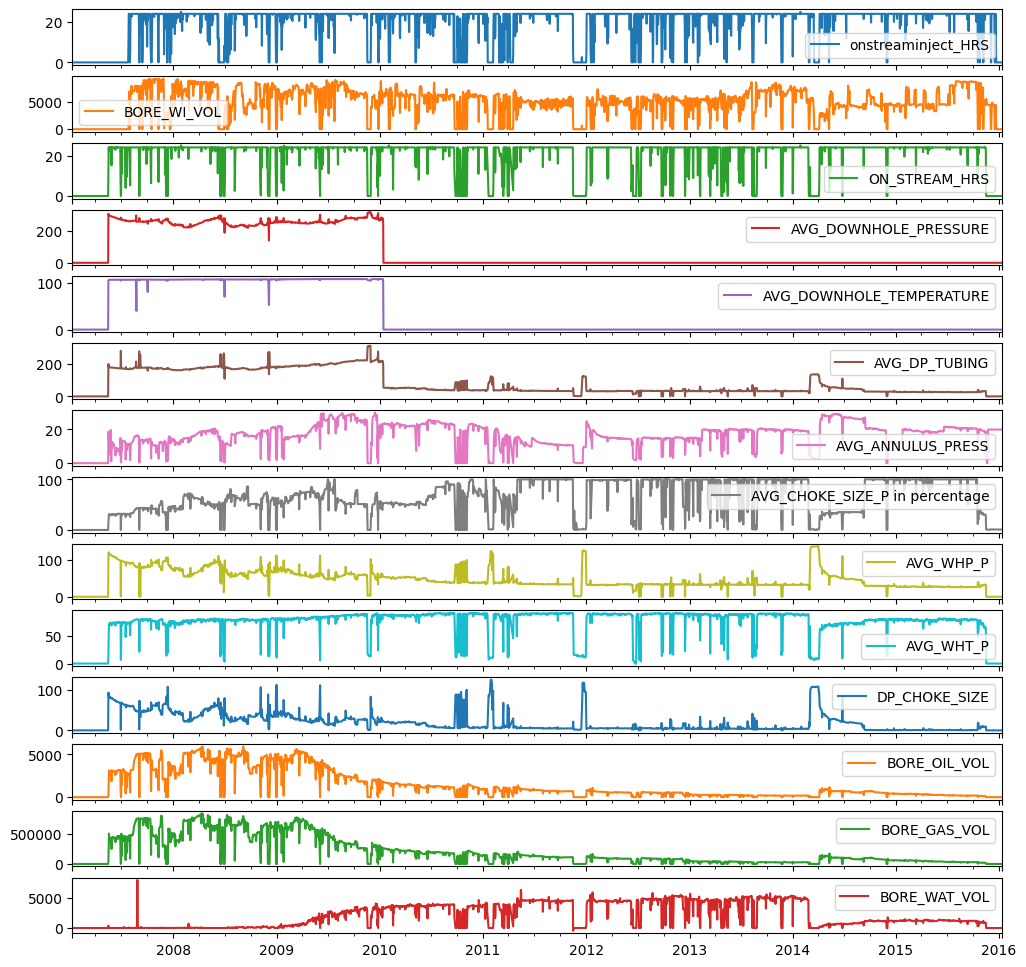

In [18]:
df = pd.read_csv('/content/Volve P-12_DatesCorrected.csv', index_col=0, parse_dates=True)
df.head()

df.columns

## y - BORE_OIL_VOL  x - everything else


Output_col = 'BORE_OIL_VOL'

# just to check how other factors are varying with respect to y
df.plot(subplots=True, figsize=(12,12))


In [19]:
df.corr()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
onstreaminject_HRS,1.000000,0.841863,0.721919,-0.008906,0.012351,0.009337,0.612743,0.633598,-0.023190,0.672484,-0.263239,0.182405,0.187947,0.411186
BORE_WI_VOL,0.841863,1.000000,0.664087,0.200564,0.221163,0.200725,0.557878,0.521919,0.093025,0.603670,-0.121651,0.368739,0.374942,0.280289
ON_STREAM_HRS,0.721919,0.664087,1.000000,0.151285,0.165454,0.143750,0.664548,0.736508,0.145377,0.890115,-0.150569,0.361124,0.371698,0.441695
AVG_DOWNHOLE_PRESSURE,-0.008906,0.200564,0.151285,1.000000,0.995501,0.959016,0.043809,-0.236868,0.607089,0.067182,0.570080,0.819920,0.816354,-0.447753
AVG_DOWNHOLE_TEMPERATURE,0.012351,0.221163,0.165454,0.995501,1.000000,0.952678,0.050419,-0.220456,0.600172,0.077749,0.556476,0.850241,0.845233,-0.456028
AVG_DP_TUBING,0.009337,0.200725,0.143750,0.959016,0.952678,1.000000,0.085105,-0.247804,0.700270,0.081012,0.651796,0.778941,0.774962,-0.403919
AVG_ANNULUS_PRESS,0.612743,0.557878,0.664548,0.043809,0.050419,0.085105,1.000000,0.424520,0.023069,0.637504,-0.203826,0.163663,0.165688,0.299597
AVG_CHOKE_SIZE_P in percentage,0.633598,0.521919,0.736508,-0.236868,-0.220456,-0.247804,0.424520,1.000000,-0.259519,0.775045,-0.501936,-0.049757,-0.043856,0.676490
AVG_WHP_P,-0.023190,0.093025,0.145377,0.607089,0.600172,0.700270,0.023069,-0.259519,1.000000,0.103721,0.934167,0.544204,0.548123,-0.323962
AVG_WHT_P,0.672484,0.603670,0.890115,0.067182,0.077749,0.081012,0.637504,0.775045,0.103721,1.000000,-0.223074,0.245750,0.256457,0.580916


In [20]:
corr_df = pd.DataFrame(df.corr()[Output_col].sort_values(ascending=False)[1:])
corr_df.columns = ['Correlation']
corr_df


,Correlation
BORE_GAS_VOL,0.998661
AVG_DOWNHOLE_TEMPERATURE,0.850241
AVG_DOWNHOLE_PRESSURE,0.819920
AVG_DP_TUBING,0.778941
AVG_WHP_P,0.544204
DP_CHOKE_SIZE,0.434375
BORE_WI_VOL,0.368739
ON_STREAM_HRS,0.361124
AVG_WHT_P,0.245750
onstreaminject_HRS,0.182405


In [21]:
# separate the input fields that have more correlation to the output to avoid leakage

input_col = corr_df[(abs(corr_df['Correlation']) > 0.2) & ((corr_df['Correlation']) < 0.9)].index
input_col

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P', 'BORE_WAT_VOL'],
      dtype='object')

## Moving towards ML

In [22]:
# let's create the metrics now
x = df[input_col]
y = df[Output_col]

input_col

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P', 'BORE_WAT_VOL'],
      dtype='object')

Here we are trying to create y as a function of x. By default we are considering that realationship between y and x is linear. So we are using linear regression algorithm. $ f $ here is the model that keeps changing in machine learning

here we have to keep one portion of data untouched, which will be used for modeling and the remaining part of the data for validation
## $ y = f(x) + e $




In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2007-01-09 to 2016-01-12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onstreaminject_HRS              3291 non-null   float64
 1   BORE_WI_VOL                     3291 non-null   int64  
 2   ON_STREAM_HRS                   3291 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64
 5   AVG_DP_TUBING                   3291 non-null   float64
 6   AVG_ANNULUS_PRESS               3291 non-null   float64
 7   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64
 8   AVG_WHP_P                       3291 non-null   float64
 9   AVG_WHT_P                       3291 non-null   float64
 10  DP_CHOKE_SIZE                   3291 non-null   float64
 11  BORE_OIL_VOL                    3291 non-null   float64
 12  BORE_GAS_VOL    

If you look at the data there are 3291 rows,
So I would use 3000 days to train the data and the remaining 291 for validation.
Ideal practice in any time series modeling algorithm is to not use shuffling

Also I checked weather the data has null values are not. It has no outliers it's an ideal data

In [24]:
train_length = 3000 # no of days

x_train = x.iloc[:train_length,:]
y_train = y[:train_length]
x_test = x.iloc[train_length:,:]
y_test = y[train_length:]

Now we need to scale this data. why ? If we feed this data directly to the machine learning model, because of the bias and magnitude , the machine will treat this as if high magnitude features are very important compared to the low magnitude. So it is always a good practice to scale this data.

Feature scaling makes your machine learning model's converge really fast

you would never fit scaler on your entire data set. you have to use the scaling algorithm only on the training data

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
# linear regression

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train_scaled, y_train)

LinearRegression()

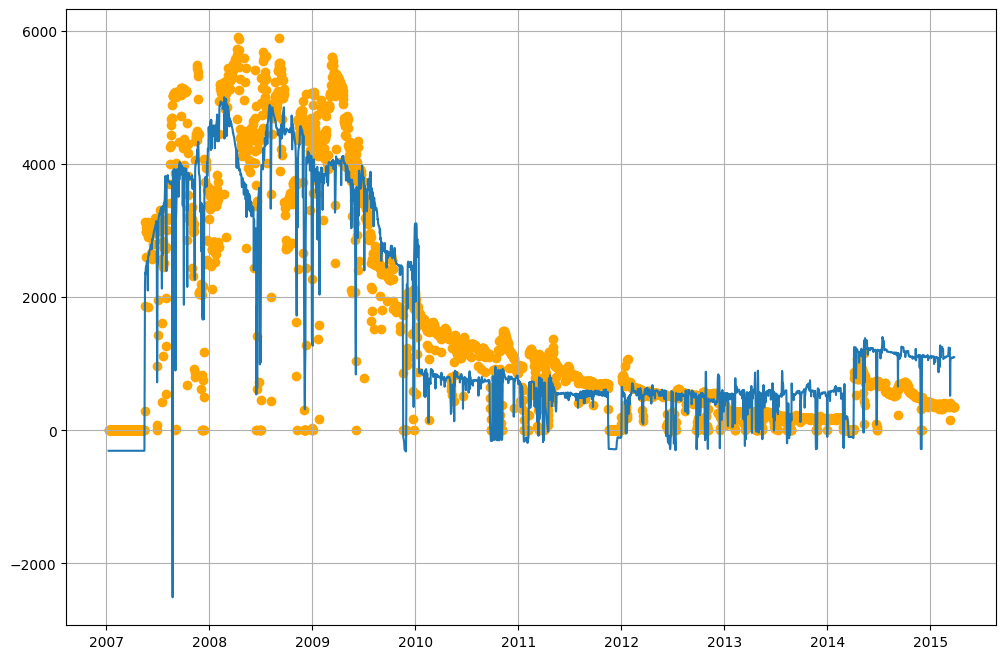

In [27]:
yp_train = lm.predict(x_train_scaled)

# let's plot the predicted data

plt.figure(figsize=(12,8))
plt.scatter(df.index[:train_length], y_train, color='orange') #actual training data
plt.plot(df.index[:train_length],yp_train) # predicted training data
plt.grid()

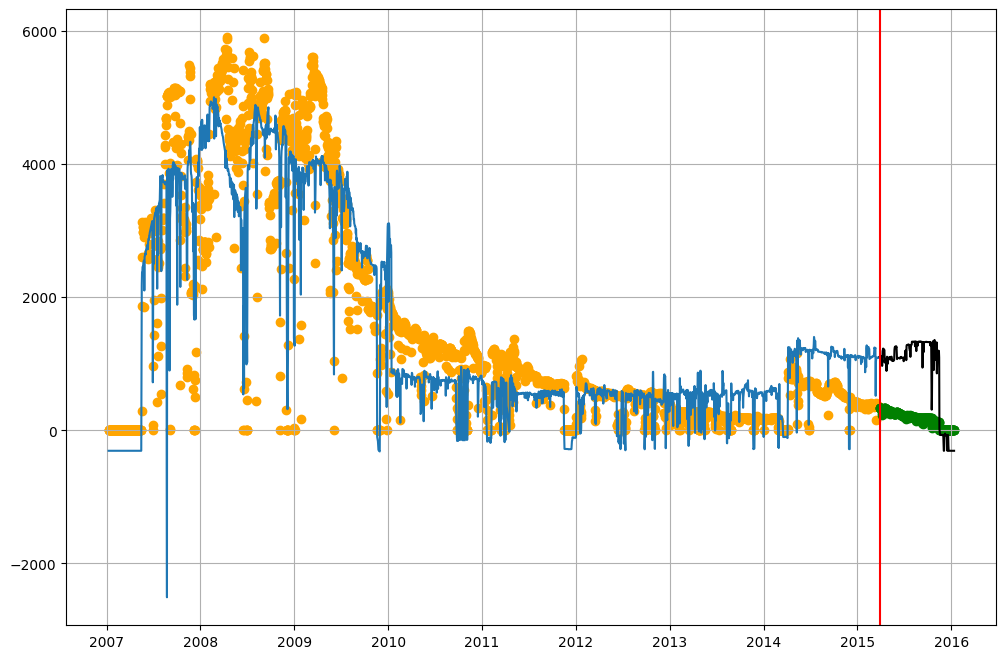

In [28]:
# let's plot the testing data

yp_test = lm.predict(x_test_scaled)

plt.figure(figsize=(12,8))
plt.scatter(df.index[:train_length], y_train, color='orange')
plt.plot(df.index[:train_length],yp_train)
plt.scatter(df.index[train_length:], y_test, color='green')
plt.plot(df.index[train_length:],yp_test,color='black')

plt.axvline(df.index[train_length], color='red') # to show the difference
plt.grid()

If you observe the above predicted data $(black)$ which is way off from the actual data $(green)$. In some cases the model is predicting negative oil rates, which should not be the case. -- That means this model is not performing well.

what could be the reason ?

I did not handle multicollinearlity, non-linearity. I assumed that y and x are linearly related. There could be several other reasons as well, even though sometimes your model is performing well in working sense, it would fail in reality. We do need domain knowledge at some point to see which factors are affecting the output we are expecting

#### Random forest

Now we will use random forest, it is a model that generalises well. It creates multiple mini models and output would be the average of all those mini models. So i guess it would be the better option to see if it predicts well.


In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
yp_train = rf.predict(x_train)
yp_test = rf.predict(x_test)

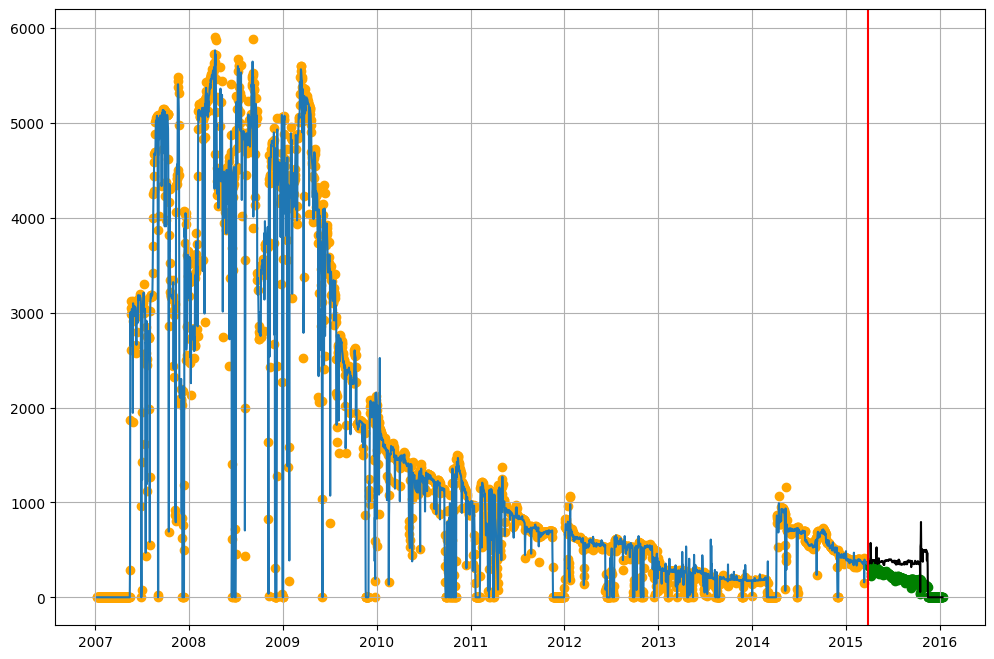

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(df.index[:train_length], y_train, color='orange')
plt.plot(df.index[:train_length],yp_train)
plt.scatter(df.index[train_length:], y_test, color='green')
plt.plot(df.index[train_length:],yp_test,color='black')

plt.axvline(df.index[train_length], color='red') # to show the difference
plt.grid()

This algorithm has understood the crocks better. Not sure if this works better in real life

So the black line here is the forecast of the next few months
y-units = barrels/day
x-units = days
area under this curve would be barrels
To use this in real world to predict oil rates multiply the barrels under area with current oil prices. So by that you can say in future some x dollars you can expect as the cash flow.

So based on that you can do economic analysis. you can forcast your investments over the next year and if your investments are way off the charts comapred to the returns you are receiving, based on that you can make a decision.

In [33]:
import json
from google.colab import files
files.upload()
notebook_path = 'Oil_rates_prediction.ipynb'

# Function to add metadata
def add_metadata(notebook_path, owner_name):
    with open(notebook_path, 'r') as f:
        notebook = json.load(f)
    notebook['metadata']['owner'] = owner_name
    with open(notebook_path, 'w') as f:
        json.dump(notebook, f, indent=2)
    print(f"Metadata added: {owner_name}")

# Example usage (for local environment)
# add_metadata('path_to_notebook.ipynb', 'Your Name')

# For Google Colab, save to Google Drive or download modified notebook


add_metadata(notebook_path, 'Navya Sri Racha')
files.download(notebook_path)

Saving Oil_rates_prediction.ipynb to Oil_rates_prediction.ipynb
Metadata added: Navya Sri Racha


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>